In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
from load_data import *
from util import *

In [2]:
path = '/media/clo302/3TB_RAID/data/TCGA_embedding/geneSCF/'

In [3]:
#d12_df = pd.read_csv(path+'gemb_d12_bottom_GO_BP.tsv', sep='\t')
#d13_df = pd.read_csv(path+'gemb_d13_bottom_GO_BP.tsv', sep='\t')
d17_df = pd.read_csv(path+'gemb_d17_top_GO_BP.tsv', sep='\t')
d22_df = pd.read_csv(path+'gemb_d22_top_GO_BP.tsv', sep='\t')
d25_df = pd.read_csv(path+'gemb_d25_top_GO_BP.tsv', sep='\t')
d35_df = pd.read_csv(path+'gemb_d35_bottom_GO_BP.tsv', sep='\t')
d43_df = pd.read_csv(path+'gemb_d43_bottom_GO_BP.tsv', sep='\t')
d46_df = pd.read_csv(path+'gemb_d46_bottom_GO_BP.tsv', sep='\t')

In [4]:
dfs = [d43_df, d17_df, d22_df, d25_df, d35_df, d46_df]
dims = ['43', '17', '22', '25', '35', '46']

#### data preparation

In [5]:
sig_dfs = [get_sig_df(df, th_size=10) for df in dfs]

/media/clo302/3TB_RAID/data/TCGA_embedding/util.py:196: RuntimeWarning: divide by zero encountered in log10
  tFDR = np.log10(df['Benjamini and Hochberg (FDR)'])*-1
/media/clo302/3TB_RAID/data/TCGA_embedding/util.py:197: RuntimeWarning: divide by zero encountered in log10
  tpval = np.log10(df['P-value'])*-1


#### bubble plot ranked by -log pval

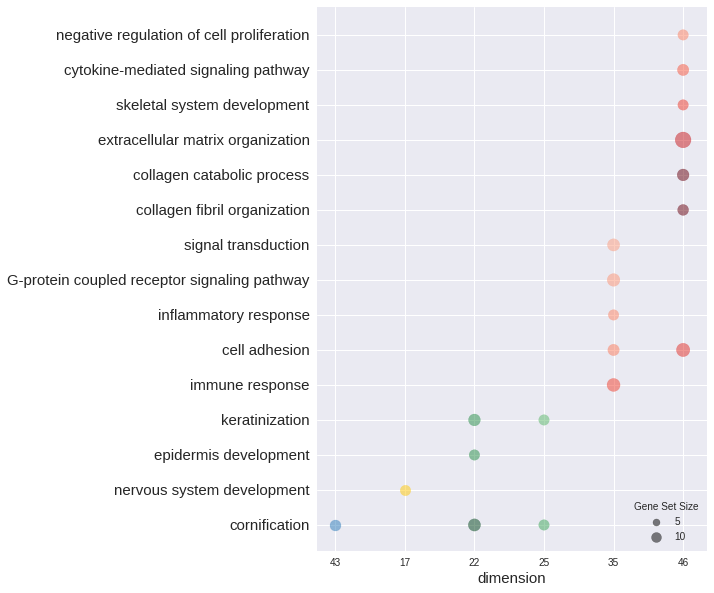

In [8]:
plot_go_bubble_compare(sig_dfs, dims, 
                       cmaps=['Blues', 'Wistia', 'Greens', 'Greens', 'Reds', 'Reds'], 
                       gs_prox=[5,10])

#### enrichment map

In [7]:
sig_nodup_df = combine_sig_dfs(sig_dfs, dims)

In [8]:
sig_nodup_df

,FDR,GO,genes,name,pval,size,dimension
0,3.558084,GO:0007399,84530; 1641; 1826; 11341; 5454; 4661; 1995; 10...,nervous system development,6.125110,11,17
1,9.746154,GO:0008544,8796; 3868; 3852; 3866; 6699; 5650; 3872; 3914...,epidermis development,12.020698,11,22
2,7.296767,GO:0006955,2533; 10261; 3512; 2214; 2209; 3575; 944; 7292...,immune response,10.179291,17,35
3,3.416525,GO:0006954,1536; 3689; 729230; 5294; 1233; 1234; 5027; 81...,inflammatory response,5.395960,11,35
4,2.356983,GO:0007186,27334; 729230; 5294; 1524; 1233; 1234; 9459; 8...,G-protein coupled receptor signaling pathway,3.917289,16,35
5,1.869158,GO:0007165,2533; 5579; 2209; 3575; 2123; 944; 3702; 10666...,signal transduction,3.128433,15,35
6,20.000000,GO:0030199,1277; 1281; 1290; 1278; 1301; 1289; 4320; 4060...,collagen fibril organization,20.000000,12,46
7,20.000000,GO:0030574,1277; 1281; 1290; 1278; 4313; 1301; 1291; 1292...,collagen catabolic process,20.000000,14,46
8,10.207147,GO:0030198,8038; 1277; 1281; 2335; 1290; 1634; 1278; 6678...,extracellular matrix organization,12.712297,25,46
9,7.648137,GO:0001501,1277; 1281; 1290; 1278; 2260; 4318; 1311; 1063...,skeletal system development,9.931438,11,46


In [9]:
dims = ['17', '22', '35', '46']
col_pal = ['yellow', 'green', 'red', 'red']
col_dict = {d:c for d,c in zip(dims, col_pal)}
col_dict[np.nan] = 'k'

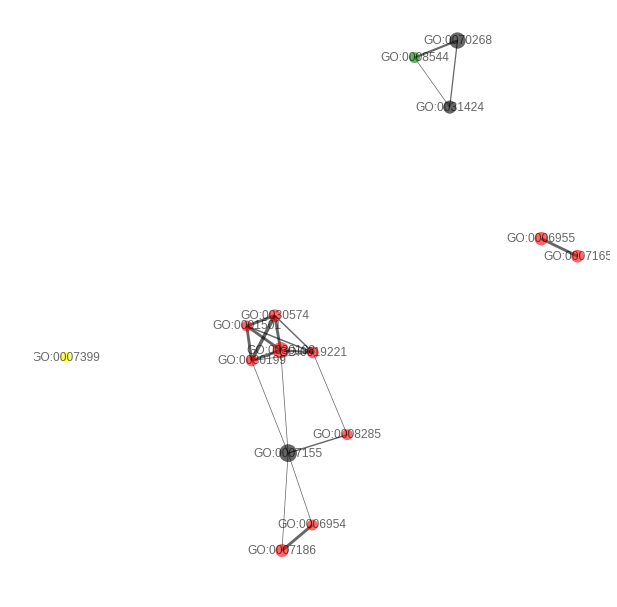

In [26]:
plot_enrichmap_compare(sig_nodup_df, col_dict, k=0.3, scale=0.5)

#### LIHC subtyping dimension

In [30]:
d10_df = pd.read_csv(path+'gemb_d10_top_500_GO_BP.tsv', sep='\t')
d12_df = pd.read_csv(path+'gemb_d12_bottom_500_GO_BP.tsv', sep='\t')
d18_df = pd.read_csv(path+'gemb_d18_top_500_GO_BP.tsv', sep='\t')

In [31]:
lihc_dfs = [d10_df, d12_df, d18_df]
lihc_dims = ['10', '12', '18']

In [34]:
lihc_sig_dfs = [get_sig_df(df, th_size=5) for df in lihc_dfs]

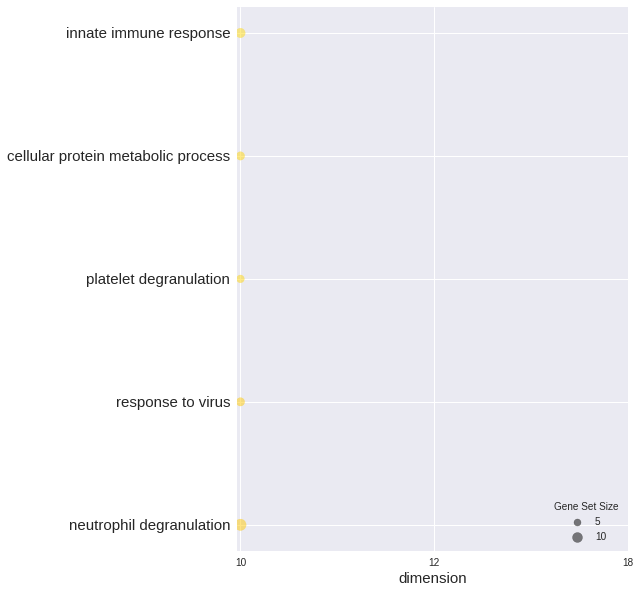

In [35]:
plot_go_bubble_compare(lihc_sig_dfs, lihc_dims, 
                       cmaps=['Wistia', 'Greens', 'Blues'], 
                       gs_prox=[5,10])

In [36]:
lihc_sig_nodup_df = combine_sig_dfs(lihc_sig_dfs, lihc_dims)

In [37]:
lihc_sig_nodup_df

,FDR,GO,genes,name,pval,size,dimension
0,3.469090,GO:0043312,2512; 2495; 226; 6280; 5836; 1508; 2950; 5315;...,neutrophil degranulation,6.140263,13,10
1,3.394337,GO:0009615,2023; 1191; 7178; 3925; 4599; 2625; 684;,response to virus,5.889419,7,10
2,2.017776,GO:0002576,2335; 226; 6678; 1191; 8407; 3959;,platelet degranulation,4.387919,6,10
3,2.006928,GO:0044267,348; 2335; 3956; 7316; 6696; 1462; 567;,cellular protein metabolic process,4.280160,7,10
4,1.356435,GO:0045087,6280; 7316; 1191; 4599; 2625; 567; 684; 3428; ...,innate immune response,3.007881,9,10


In [25]:
col_pal = ['yellow', 'green', 'red']
col_dict = {d:c for d,c in zip(lihc_dims, col_pal)}
col_dict[np.nan] = 'k'

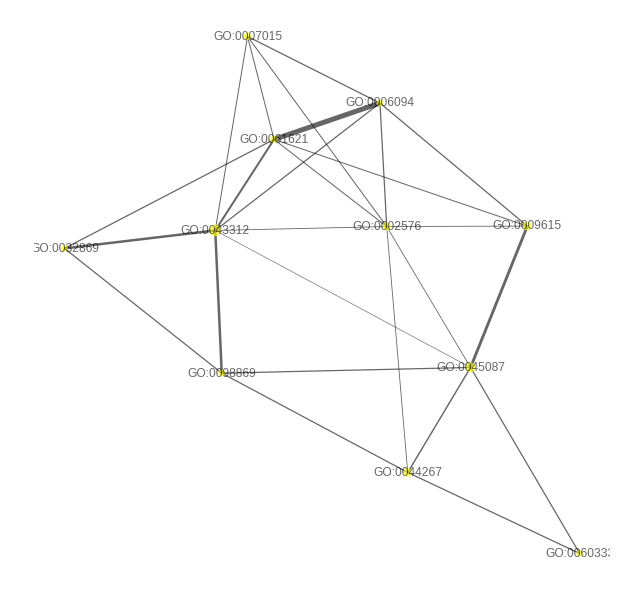

In [26]:
plot_enrichmap_compare(lihc_sig_nodup_df, col_dict, k=0.3, scale=0.5)